___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project - Solutions

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# print version
from platform import python_version
print ('python version: ', python_version())
print ('Pandas version:', pd.__version__)
print ('seaborn version:', sns.__version__)
import matplotlib
print ('matplotlib version:', matplotlib.__version__)
print("numpy version: ",np.version.version)

python version:  3.7.1
Pandas version: 0.23.4
seaborn version: 0.9.0
matplotlib version: 3.0.2
numpy version:  1.15.4


## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

Text(0.5, 0, 'Age')

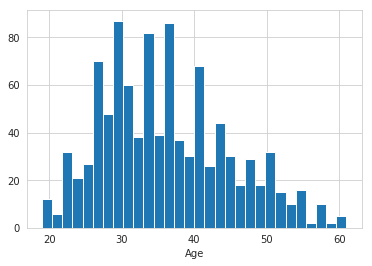

In [7]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

/home/jun-chieh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


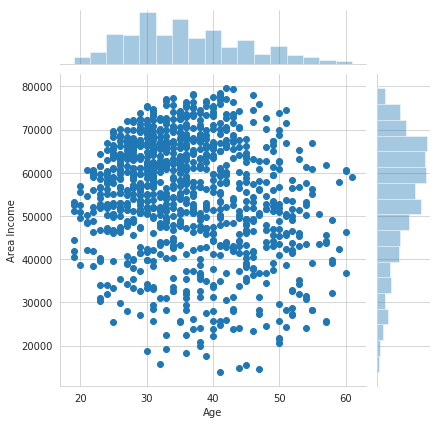

In [8]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

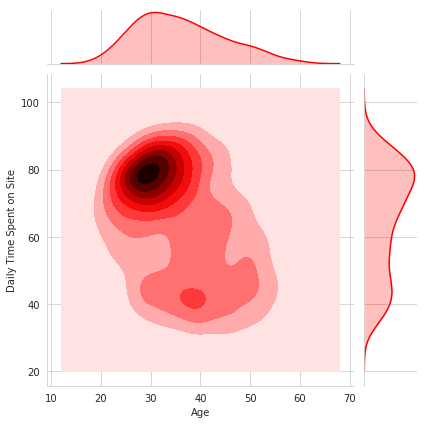

In [9]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');


** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

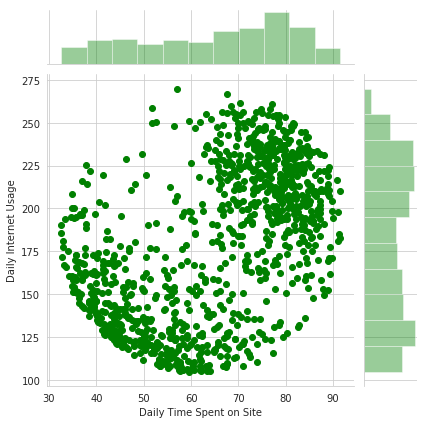

In [10]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')


** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

/home/jun-chieh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/jun-chieh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/jun-chieh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


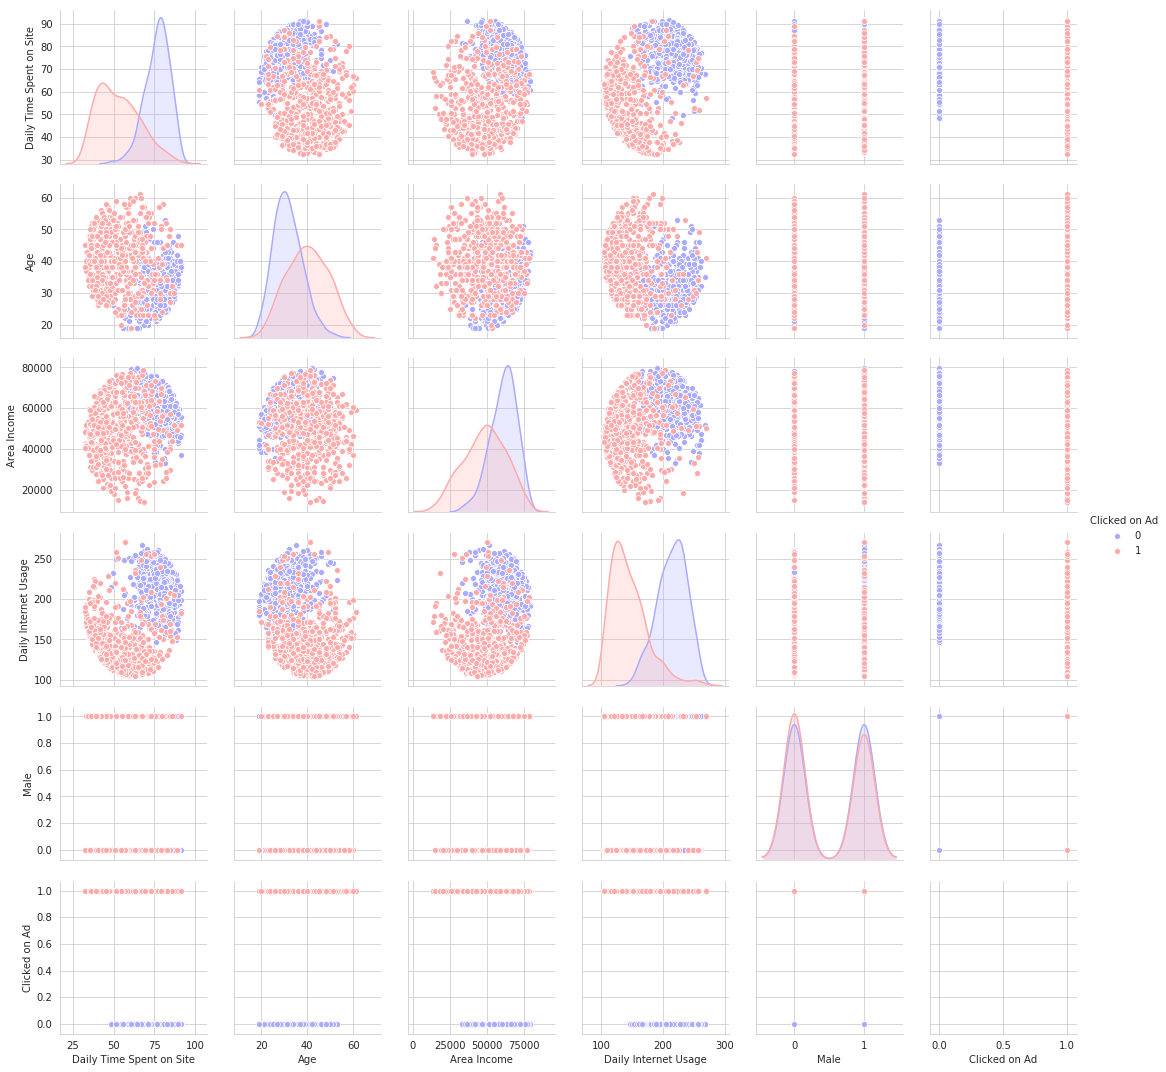

In [11]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [12]:
from sklearn.model_selection import train_test_split

import sklearn 
print('sklearn version',sklearn.__version__)

sklearn version 0.20.2


In [13]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/jun-chieh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [17]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

   micro avg       0.91      0.91      0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



## Great Job!

X.shape: (1000, 2)
Y.shape: (1000,)
X_train.shape: (670, 2)
X_test.shape: (330, 2)
Y_train.shape: (670,)
Y_test.shape: (330,)
predictions.shape: (330,)
X1_min, X1_max :  13996.5 79484.8
X2_min, X2_max :  104.78 269.96
X1.shape : (1000, 501)
X2.shape : (1000, 501)
grid : [[13996.5       104.78   ]
 [13996.5       105.11036]
 [13996.5       105.44072]
 ...
 [79419.3117    269.29928]
 [79419.3117    269.62964]
 [79419.3117    269.96   ]]
grid.shape : (501000, 2)
surface.shape (1000, 501)


/home/jun-chieh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'X, Y')

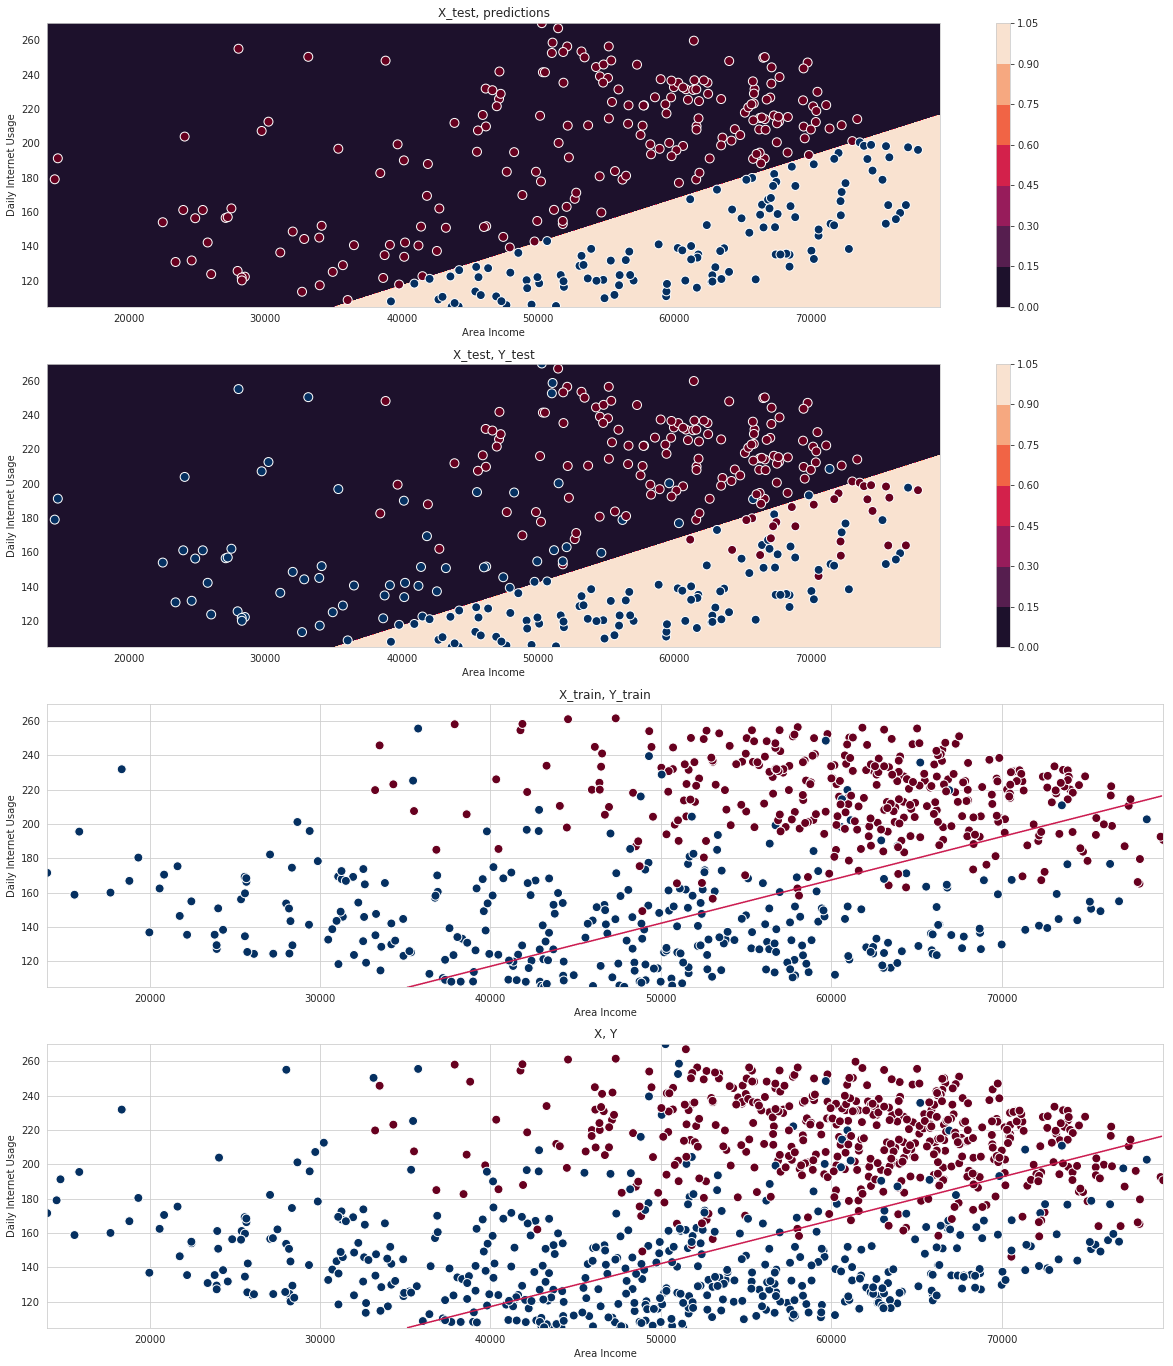

In [20]:
# ref:
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733442?start=665
# visualize the trained model.
#
X = ad_data[['Area Income','Daily Internet Usage']]
Y = ad_data['Clicked on Ad']
print('X.shape:',X.shape)
print('Y.shape:',Y.shape)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print('X_train.shape:',X_train.shape)
print('X_test.shape:',X_test.shape)
print('Y_train.shape:',Y_train.shape)
print('Y_test.shape:',Y_test.shape)


logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

predictions = logmodel.predict(X_test)
print('predictions.shape:',predictions.shape)


# plot
X1_min = X['Area Income'].min()
X1_max = X['Area Income'].max()
X2_min = X['Daily Internet Usage'].min()
X2_max = X['Daily Internet Usage'].max()
print('X1_min, X1_max : ',X1_min,X1_max)
print('X2_min, X2_max : ',X2_min,X2_max)

X1,  X2 = np.mgrid[X1_min:X1_max:(X1_max-X1_min)/1000, X2_min:X2_max:(X2_max-X2_min)/500]
print('X1.shape :',X1.shape)
print('X2.shape :',X2.shape)

grid = np.c_[X1.ravel(), X2.ravel()]
print('grid :', grid)
print('grid.shape :', grid.shape)

surface = logmodel.predict(grid).reshape(X1.shape)
print('surface.shape',surface.shape)

f, ax = plt.subplots(nrows=4,ncols=1,figsize=(20,24))

# individual colorbar in subplot :
# https://stackoverflow.com/questions/13784201/matplotlib-2-subplots-1-colorbar
# https://matplotlib.org/examples/images_contours_and_fields/pcolormesh_levels.html
    
# contour map
for ii in np.arange(0,2):
    contour = ax[ii].contourf(X1,X2,surface, cmap='rocket',vmin=0,vmax=1)
    f.colorbar(contour,ax=ax[ii])
    ax[ii].set(xlim=(X1_min,X1_max),ylim=(X2_min,X2_max),xlabel="Area Income", 
        ylabel="Daily Internet Usage")

# decision boundary
for ii in np.arange(2,4):
    #contour = ax[ii].contourf(X1,X2,surface, cmap='rocket',vmin=0,vmax=1)
    contour = ax[ii].contour(X1,X2,surface, levels=[0.5], cmap='rocket',vmin=0,vmax=1)
    #f.colorbar(contour,ax=ax[ii])
    ax[ii].set(xlim=(X1_min,X1_max),ylim=(X2_min,X2_max),xlabel="Area Income", 
        ylabel="Daily Internet Usage")
    
ax[0].scatter(X_test['Area Income'],X_test['Daily Internet Usage'],c=predictions,cmap='RdBu',
           vmin=0,vmax=1,s=80,edgecolor='white',linewidth=1)
ax[0].set_title('X_test, predictions')

ax[1].scatter(X_test['Area Income'],X_test['Daily Internet Usage'],c=Y_test,cmap='RdBu',
           vmin=0,vmax=1,s=80,edgecolor='white',linewidth=1)
ax[1].set_title('X_test, Y_test')

ax[2].scatter(X_train['Area Income'],X_train['Daily Internet Usage'],c=Y_train,cmap='RdBu',
           vmin=0,vmax=1,s=80,edgecolor='white',linewidth=1)
ax[2].set_title('X_train, Y_train')

ax[3].scatter(X['Area Income'],X['Daily Internet Usage'],c=Y,cmap='RdBu',
           vmin=0,vmax=1,s=80,edgecolor='white',linewidth=1)
ax[3].set_title('X, Y')

#ax_c = f.colorbar(contour)
#ax_c.set_label('Clicked on Ad (0 or 1)')
#ax_c.set_ticks([0, 0.5, 1])

